### This notebook contains the analysis of London BnB Listings dataset for 6th September 2023

Data can be downloaded from the link: http://insideairbnb.com/get-the-data.html

In [2]:
#Import the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [3]:
#Read the data
data = pd.read_csv("Data/LondonBnBListings.csv")

C:\Users\Aravind\AppData\Local\Temp\ipykernel_21580\1292789967.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/LondonBnBListings.csv")


In [4]:
#Let us see the shape of the data
data.shape

(87946, 75)

In [5]:
#Let us explore few rows of the data to get a better picture
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.794600e+04,8.794600e+04,8.794600e+04,87941.000000,87941.000000,0.0,87946.000000,87946.000000,87946.000000,0.0,55172.000000,86812.000000,87946.000000,8.794600e+04,87945.000000,87945.000000,8.794500e+04,8.794500e+04,87945.000000,8.794500e+04,0.0,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000,64853.000000,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000
mean,3.586523e+17,2.023091e+13,1.589904e+08,48.666629,85.809804,NaN,51.509557,-0.127900,3.165386,NaN,1.785253,1.803771,5.618050,6.712553e+03,5.284814,9.505191,4.951972e+05,4.952144e+05,7.845350,4.952081e+05,NaN,7.821663,18.679974,31.366680,121.112808,17.977236,5.797194,0.513406,4.596540,4.712780,4.623333,4.777310,4.798890,4.720487,4.593404,18.140950,13.852284,4.133548,0.029154,1.014903
std,4.121119e+17,2.626577e+01,1.694033e+08,293.465172,523.634388,NaN,0.048749,0.099645,1.980390,NaN,1.109277,1.276012,23.571976,1.770410e+06,23.128214,34.870836,3.242942e+07,3.242942e+07,31.616212,3.242942e+07,NaN,10.344472,21.884045,34.303506,134.554102,42.834975,12.748319,1.256807,0.750778,0.500756,0.551075,0.457757,0.451838,0.421893,0.536391,63.745275,46.876541,24.742723,0.490367,1.365452
min,1.391300e+04,2.023091e+13,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,NaN,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,2.023091e+13,2.186737e+07,1.000000,1.000000,NaN,51.483371,-0.189174,2.000000,NaN,1.000000,1.000000,1.000000,5.500000e+01,1.000000,2.000000,9.000000e+01,1.200000e+02,1.100000,1.200000e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,4.650000,4.500000,4.750000,4.790000,4.630000,4.490000,1.000000,0.000000,0.000000,0.000000,0.150000
50%,4.935854e+07,2.023091e+13,8.140696e+07,2.000000,3.000000,NaN,51.513780,-0.126400,2.000000,NaN,2.000000,1.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,7.310000e+02,2.400000,6.326000e+02,NaN,1.000000,7.000000,14.000000,65.000000,4.000000,1.000000,0.000000,4.820000,4.880000,4.800000,4.940000,4.970000,4.840000,4.740000,2.000000,1.000000,0.000000,0.000000,0.540000
75%,8.164776e+17,2.023091e+13,2.668211e+08,7.000000,10.000000,NaN,51.539420,-0.068066,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.800000,1.125000e+03,NaN,14.000000,37.000000,65.000000,249.000000,16.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,1.320000
max,9.738958e+17,2.023091e+13,5.355140e+08,3023.000000,5272.000000,NaN,51.681642,0.295731,16.000000,NaN,50.000000,50.000000,1125.000000,5.248556e+08,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,1536.000000,594.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,312.0

In [6]:
#Let us explore few rows of the data and their corresponding values
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",t,t,NaN,Wandsworth,NaN,51.44201,-0.18739,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",t,t,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,NaN,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0,5.0,240.0,240.0,5.0,240.0,NaN,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,25,55,85,360,2023-09-

###### Based on the column values above, we can safely ignore the following columns: id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_location, host_about, host_response_time, host_thumbnail_url, host_picture_url, host_verifications, host_has_profile_pic, neighbourhood, neighbourhood_group_cleansed, property_type, bathrooms, bathrooms_text,  minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_60, availability_90, calendar_last_scraped, number_of_reviews_l30d, first_review, last_review, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms.

The reasons are as follows:

1. Some of the columns are redundant

2. Some of the columns do not help in analysis such as urls

3. Some of the columns have mostly null values

In [7]:
data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 
           'picture_url', 'host_url', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 
           'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'bathrooms', 'bathrooms_text', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 
           'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'calendar_updated', 
           'has_availability', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews', 
           'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_cleanliness', 'review_scores_checkin', 
           'review_scores_communication', 'review_scores_location', 'calculated_host_listings_count_entire_homes', 
           'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1, inplace=True)

In [8]:
#Recheck the shape of the data
data.shape

(87946, 32)

In [9]:
#The price column is in the string format, convert the same to numeric format
data['price'] = list(data['price'].str.replace('$',"").str.replace(',','').astype('float'))

C:\Users\Aravind\AppData\Local\Temp\ipykernel_21580\772038015.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = list(data['price'].str.replace('$',"").str.replace(',','').astype('float'))


In [10]:
#Distribution of price data
data['price'].describe()

count    87946.000000
mean       181.349817
std        486.174310
min          0.000000
25%         63.000000
50%        110.000000
75%        193.000000
max      80100.000000
Name: price, dtype: float64

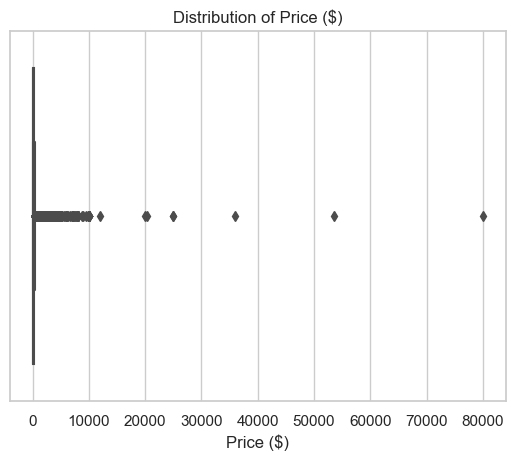

In [11]:
#Distribution of price data visually
bx = sns.boxplot(data=data, x='price')
bx.set(xlabel ="Price ($)", title ='Distribution of Price ($)')
plt.show()

In [12]:
data[data['price']>2000].shape

(245, 32)

###### As observed in the box plot and the calculations above, a very small portion of the price values lie above 2000$ i.e., 0.279%. So we can safely drop those data points from our analysis.

In [13]:
data = data[data['price'] <= 2000]
data.shape

(87701, 32)

In [14]:
#Distribution of Number of reviews (last twelve months) for a listing
data['number_of_reviews_ltm'].describe()

count    87701.000000
mean         5.810664
std         12.762453
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max        594.000000
Name: number_of_reviews_ltm, dtype: float64

**As per data dictionary of Airbnb, `number_of_reviews_ltm` is a calculated column the gives the number of reviews the listing has in the last twelve months. We can assume that more number of reviews (either good or bad) is proportional to the popularity of that particular listing. From the calculation above, over 25% of the data has the number of reviews more than 6. Therefore, we create a new column named `popularity1`.**

In [15]:
data['popularity1'] = data['number_of_reviews_ltm'] > 6

In [16]:
#Distribution of Availability of a listing for the next 365 days
data['availability_365'].describe()

count    87701.000000
mean       120.958244
std        134.476547
min          0.000000
25%          0.000000
50%         65.000000
75%        249.000000
max        365.000000
Name: availability_365, dtype: float64

**As per data dictionary of Airbnb, `availability_365` is a calculated column the gives the availability of the listing in the future. We can assume that less availability is proportional to the popularity of that particular listing. From the calculation above, around 50% of the data has availability less than 65 days. Therefore, we create a new column named `popularity2`.**

In [17]:
data['popularity2'] = data['availability_365'] <=65

In [18]:
#The column amenities contains a string of lists. We transform the same to list objects.
data['amenities'] = data['amenities'].apply(lambda x: eval(x))